In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load csv of filenames
df = pd.read_csv('filenames.csv')
df['Pose'] = df['Filename'].apply(lambda x: int(x.split('_')[1]))
df['Creator'] = df['Filename'].apply(lambda x: x.split('_')[2])
# Duplicate row if creator is 'IBC-Mangai'
duplicate_rows = df[df['Creator'] == 'IBC-Mangai']
df.loc[df['Creator'] == 'IBC-Mangai', 'Creator'] = 'IBC-Mangai2'
duplicate_rows['Creator'] = 'IBC-Mangai1'
df = df.append(duplicate_rows)

# Duplicate row if creator is 'Muscle-Watching'
duplicate_rows = df[df['Creator'] == 'Muscle-Watching']
df.loc[df['Creator'] == 'Muscle-Watching', 'Creator'] = 'Muscle-Watching2'
duplicate_rows['Creator'] = 'Muscle-Watching1'
df = df.append(duplicate_rows)

df.Creator.value_counts()

/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kelianneheinz/opt/anaconda3/envs/myvenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Muscle-Watching1             519
Muscle-Watching2             519
HisDream                     489
AVA-LEE                      376
Masumi-Channel               339
Anna-Veronika                288
Blush-with-me-Parmita        268
Pilates-by-Lisa              262
Yoga-Face                    243
Daniela-Suarez               225
FacialUP!                    198
Fit-Eagles                   177
Goldbeauty                   177
Sientete-Bien                173
OppServe                     171
Verena-Boix                  166
Funfitt-with-Susana-Yabar    165
Face-Yoga-Expert             162
Adam-Fields-DC               156
Yoga-with-Souvik             153
Glowinface                   134
Face-Yoga-Method             129
IBC-Mangai2                  127
IBC-Mangai1                  127
Instituto-Yvette-pons        126
Elvin-ile-Yoga               123
Ergotopia                    121
isaac-yiu                    120
Shraddhas-Tapperz-Dance      111
The-Uma-Show                 102
Khichi-Bea

In [46]:
# Get total number of creators
creator_df


,Creator,Gender,Apparent_Race
0,Accents-Way-English,F,White/hispanic
1,Adam-Fields-DC,F,Black
2,Anna-Veronika,F,White/hispanic
3,AVA-LEE,F,Asian
4,Blush-with-me-Parmita,F,Indian
5,Brett-Maverick,M,White/hispanic
6,Brian-Abelson,F,White/hispanic
7,Club-marea-oficial,F,White/hispanic
8,Daniela-Suarez,F,White/hispanic
9,Doctora-Claudia-Garcia,F,White/hispanic


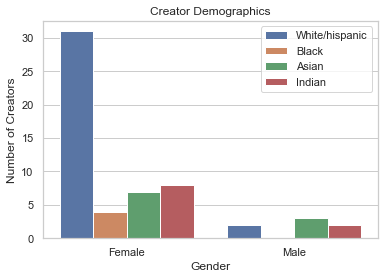

In [51]:
# Import csv of creator data
creator_df = pd.read_csv('creator_data.csv')
# Replace 'M' with "Male" in Gender column
creator_df.Gender[creator_df['Gender'] == 'M'] = "Male"
creator_df.Gender[creator_df['Gender'] == 'F'] = "Female"

# Visualize creator data
sns.countplot(x='Gender', hue='Apparent_Race', data=creator_df)
plt.title('Creator Demographics')
plt.xlabel('Gender')
plt.ylabel('Number of Creators')
plt.legend()
plt.show()


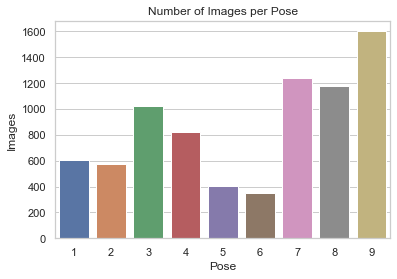

In [30]:
# set seaborn theme
sns.set_theme(style='whitegrid', palette='deep')

# Visualize number of images per pose
sns.countplot(x='Pose', data=df)
plt.title('Number of Images per Pose')
plt.xlabel('Pose')
plt.ylabel('Images')
plt.show()

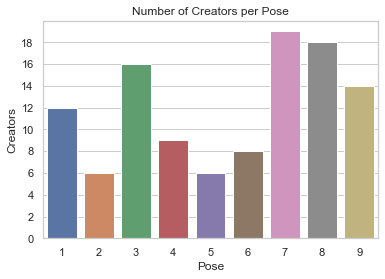

In [26]:
# Visualize number of creators per pose
creator_df = df.groupby('Pose')['Creator'].nunique()
sns.barplot(x=creator_df.index, y=creator_df.values)
plt.title('Number of Creators per Pose')
plt.yticks(np.arange(0, 20, 2))
plt.xlabel('Pose')
plt.ylabel('Creators')
plt.show()



In [ ]:
#